# ORF307 Precept 4

# Q1 Approximate solution of linear equations with multiple righthand sides

Suppose $A$ is a square invertible matrix. We seek $x$ for which $Ax$ approximates $b_i, i = 1,\dots,k$. In other words, we wish to find a value of $x$ that approximately solves the systems of equations $Ax = b_1,\dots,Ax = b_k$. Two colleagues offer suggestions about how to accomplish this.

*   Your colleague Bob proposes a multi-objective least squares approach: choose $x$ to minimize $$\lVert Ax-b_1 \rVert^2 + \dots + \lVert Ax-b_k \rVert^2.$$
*   Alice, another colleague, proposes the following method: first average the righthand sides to get $b = (1/k)(b_1 + \dots + b_k)$, and then choose $x$ by solving one system of linear equations $Ax = b$.

Oscar, a third colleague, says that the two approaches sound different but always end up with the same choice of $x$. Is Oscar right? Justify your answer, *i.e.*, either explain why the two approaches always give the same $x$, or give a specific counter-example where they do not.

# Q2 Varying the righthand sides in linearly constrained least squares

Suppose $\hat{x}$ minimizes $\lVert Ax - b \rVert^2$ subject to $Cx = d$. (You can assume that the associated KKT matrix is invertible.) We can think
of $\hat{x}$ as a function of $b$ and $d$ (which are called the righthand sides of the linearly constrained least squares problem). A colleague asserts that $\hat{x}$ is a linear function of $b$ and $d$, and so has the form $\hat{x} = Fb + Gd$ for some appropriate matrices $F$ and $G$. Is she right? If not, give a counter-example. If so, justify your answer and explain how to find the
matrices $F$ and $G$.

# Q3 Nearest vector with a given average

Let $a$ be an $n$-vector and $\beta$ a scalar. How would you
find the $n$-vector $x$ that is closest to $a$ among all n-vectors that have average value $\beta$?
Give a formula for $x$ and describe it in English.

# Q4 Rendezvous

The dynamics of two vehicles, at sampling times $t=1,2, \ldots$,
are given by
$$
x_{t+1} = Ax_t+Bu_t, \qquad
z_{t+1} = Az_t+Bv_t
$$
where the $n$-vectors $x_t$ and $z_t$ are the states of vehicles 1 and 2,
and the $m$-vectors $u_t$ and $v_t$ are the inputs of vehicles 1 and 2.
The $n \times n$ matrix $A$ and the $n \times m$ matrix
$B$ are known.

The position of vehicle 1 at time $t$ is given by $Cx_t$, where $C$ is a known $2 \times n$ matrix. Similarly, the position of vehicle 2 at time $t$ is given by $Cz_t$.

The initial states of the two vehicles are fixed and given:
$$
x_1 = x_{\mathrm{start}}, \qquad
z_1 = z_{\mathrm{start}}.
$$
We are interested in finding a sequence of inputs for the two vehicles
over the time interval $t=1, \ldots, T-1$ so that they
rendezvous at time $t=T$,
\ie, $x_T=z_T$.
You can select the inputs to the two vehicles,
$$
u_1, u_2, \ldots, u_{T-1}, \qquad
v_1, v_2, \ldots, v_{T-1}.
$$
Among choices of the sequences $u_1, \ldots, u_{T-1}$ and $v_1, \ldots, v_{T-1}$
that satisfy the rendezvous condition,
we want the one that minimizes the weighted sum of squares of
the two vehicle inputs,
$$
J = \sum_{t=1}^{T-1}\|u_t\|^2 + \lambda \sum_{t=1}^{T-1}\|v_t\|^2,
$$
where $\lambda > 0$ is a parameter that trades off the two objectives.

(a) Explain how to find the sequences $u_1, \ldots, u_{T-1}$ and $v_1, \ldots, v_{T-1}$ that minimize $J$ while satisfying the rendezvous condition by solving a constrained least-squares problem.

(b) The problem data $A$, $B$, $C$, $x_{\mathrm{start}}$, and $z_{\mathrm{start}}$ are defined below. Use **CVXPY** to find $u_1, \ldots, u_{T-1}$ and $v_1, \ldots, v_{T-1}$ for $\lambda=0.1$, $\lambda=1$, and $\lambda=10$. Plot the vehicle trajectories (i.e., their positions) for each $\lambda$.

(c) Give a simple expression for $x_T$ in the limit where $\lambda \to \infty$ and for $z_T$ in the limit where $\lambda \to 0$. Assume that for any $w \in \mathbb{R}^n$ there exist sequences $u_1, \ldots, u_{T-1}$ and $v_1, \ldots, v_{T-1}$ such that the rendezvous constraints are satisfied with $w = z_T = x_T$.

<font size="5">**Solution**<font>

(a) We find $u_1, \ldots, u_{T-1}$ and $v_1, \ldots, v_{T-1}$ by solving the constrained least-squares problem
$$
\begin{array}{ll}
\mbox{minimize} & \sum_{t=1}^{T-1} \|u_t\|^2 + \lambda \sum_{t=1}^{T-1} \|v_t\|^2 \\
\mbox{subject to} & x_{t+1} = Ax_t + Bu_t, \qquad t \in 1,\ldots,T-1 \\
& z_{t+1} = Az_t + Bv_t, \qquad t \in 1,\ldots,T-1 \\
& x_1 = x_{\mathrm{start}} \\
& z_1 = z_{\mathrm{start}} \\
& x_T = z_T.
\end{array}
$$

(b) 

In [16]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# See https://www.cvxpy.org/index.html for more details about CVXPY

def Rendezvous_solver(lamb = 0.1):
    
    m = 4
    T = 200
    h = 0.1
    eta = 0.05
    A = np.matrix([[1, 0, h, 0], [0, 1, 0, h], [0, 0, 1 - (eta * h)/m, 0], [0, 0, 0, 1 - (eta * h)/m]])
    B = np.matrix([[0, 0], [0, 0], [h/m, 0], [0, h]])
    C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])

    # Starting conditions
    x_start = np.array([0, 0, -5, 0])
    z_start = np.array([10, 10, 0, -5])
    
    # Define variables
    u, v = cp.Variable((2, T - 1)), cp.Variable((2, T - 1))
    x, z = cp.Variable((4, T)), cp.Variable((4, T))

    # Define objective
    objective = cp.Minimize(cp.sum_squares(u) + lamb * cp.sum_squares(v))

    # Define constraints
    constraints = [x[:, 0] == x_start.T, z[:, 0] == z_start.T, x[:, T - 1] == z[:, T - 1]]
    for i in range(T - 1):
        constraints += [x[:, i + 1] == A @ x[:, i] + B @ u[:, i],\
                        z[:, i + 1] == A @ z[:, i] + B @ v[:, i]]

    # Solve
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    return x.value, z.value

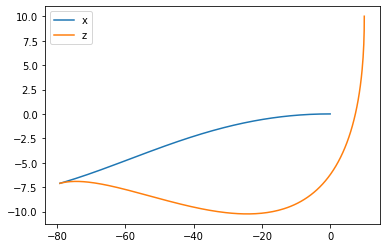

In [17]:
# Plot with lambda = 0.1
x, z = Rendezvous_solver(lamb = 0.1)
C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])
x_position = C @ x
z_position = C @ z
plt.plot(x_position[0].A1, x_position[1].A1, label='x')
plt.plot(z_position[0].A1, z_position[1].A1, label='z')
plt.legend()

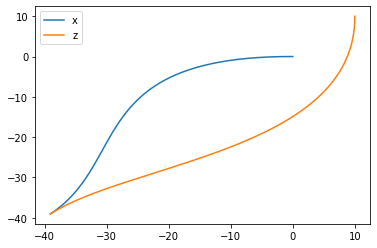

In [18]:
x, z = Rendezvous_solver(lamb = 1)
C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])
x_position = C @ x
z_position = C @ z
plt.plot(x_position[0].A1, x_position[1].A1, label='x')
plt.plot(z_position[0].A1, z_position[1].A1, label='z')
plt.legend()

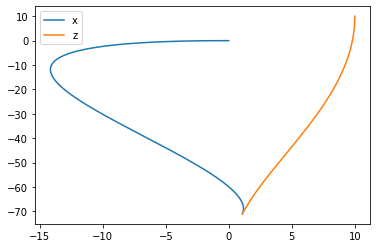

In [11]:
x, z = Rendezvous_solver(lamb = 10)
C = np.matrix([[1, 0, 0, 0], [0, 1, 0, 0]])
x_position = C @ x
z_position = C @ z
plt.plot(x_position[0].A1, x_position[1].A1, label='x')
plt.plot(z_position[0].A1, z_position[1].A1, label='z')
plt.legend()

(c) As $\lambda \to \infty$, the optimal $v \to 0$. Thus in the limit $v = 0$ and $z_T = A^{T-1}z_{\mathrm{start}}$. This solution is valid because we assume that there is some sequence $u_1, \ldots, u_{T-1}$ such that $x_T = A^{T-1}z_{\mathrm{start}}$.

We can divide the objective in (a) by $\lambda$ and obtain the equivalent constrained least-squares problem
$$
\begin{array}{ll}
\mbox{minimize} & (1/\lambda)\sum_{t=1}^{T-1} \|u_t\|^2 + \sum_{t=1}^{T-1} \|v_t\|^2 \\
\mbox{subject to} & x_{t+1} = Ax_t + Bu_t, \qquad t \in 1,\ldots,T-1 \\
& z_{t+1} = Az_t + Bv_t, \qquad t \in 1,\ldots,T-1 \\
& x_1 = x_{\mathrm{start}} \\
& z_1 = z_{\mathrm{start}} \\
& x_T = z_T,
\end{array}
$$
Certainly as $\lambda \to 0$, $1/\lambda \to \infty$ and the optimal $u \to 0$. Thus in the limit $u = 0$ and $x_T = A^{T-1}x_{\mathrm{start}}$. Again, this solution is valid because we assume that there is some sequence $v_1, \ldots, v_{T-1}$ such that $z_T = A^{T-1}x_{\mathrm{start}}$.